In [1]:
import pandas as pd
import pyodbc
from dotenv import load_dotenv
import os

In [7]:
from utils import get_grouped_df

df = get_grouped_df()

/home/apprenant/Documents/DEV_IA/Predictif_des_Entrees_de_Films/notebooks/utils.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


## Analyse exploratoire

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.head()

,title,entries,date,realisateur,budget,titre_non_modifie,film_id,nom_acteur,nom_compagnie,nom_genre
0,#chef,13798,2014-10-29,Jon Favreau,11000000,#Chef,1888,"John Leguizamo, Jon Favreau, Sofía Vergara, Em...","Altus Media, Fairview Entertainment, Prescience",Comédie
1,#piresoiree,66666,2017-08-02,Lucia Aniello,20000000,# Pire Soirée,2260,"Scarlett Johansson, Jillian Bell, Ilana Glazer...","Paulilu Productions, Sony Pictures, Columbia P...","Drame, Comédie"
2,(500)joursensemble,82432,2009-09-30,Marc Webb,7500000,(500) jours ensemble,844,"Zooey Deschanel, Joseph Gordon-Levitt, Chloë G...","Fox Searchlight Pictures, Watermark Pictures, ...","Comédie, Drame, Romance"
3,100%cachemire,197125,2013-12-11,Valérie Lemercier,1400000,100% cachemire,1680,"Nanou Garcia, Gilles Lellouche, Valérie Lemerc...","SCOPE Pictures, Rectangle Productions",Comédie
4,10000,474853,2008-03-12,Roland Emmerich,105000000,10 000,606,"Cliff Curtis, Steven Strait, Nathanael Baring,...","Centropolis Entertainment, Legendary Pictures,...","Aventure, Action, Drame, Fantastique"


In [11]:
df.shape

(2746, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2746 non-null   object
 1   entries            2746 non-null   int64 
 2   date               2746 non-null   object
 3   realisateur        2746 non-null   object
 4   budget             2746 non-null   int64 
 5   titre_non_modifie  2746 non-null   object
 6   film_id            2746 non-null   int64 
 7   nom_acteur         2746 non-null   object
 8   nom_compagnie      2746 non-null   object
 9   nom_genre          2746 non-null   object
dtypes: int64(3), object(7)
memory usage: 214.7+ KB


In [40]:
df.describe()

,entries,budget,film_id
count,"2,746","2,746","2,746"
mean,"321,822","46,351,651","1,374"
std,"443,769","52,884,925",793
min,31,"1,016,549",1
25%,"68,376","10,000,000",687
50%,"169,578","26,000,000","1,374"
75%,"377,103","61,750,000","2,060"
max,"4,378,720","460,000,000","2,746"


In [88]:
# Aplatir les listes dans la colonne 'nom_acteur'
actors_list = df['nom_acteur'].explode()

# Supprimer les valeurs manquantes (NaN)
actors_list = actors_list.dropna()

# Compter le nombre d'occurrences de chaque acteur
actors_count = actors_list.value_counts()

# Top 10 des acteurs les plus fréquents
top_actors = actors_count.nlargest(10)

# Visualisation des acteurs les plus fréquents
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Acteur')
plt.ylabel('Nombre de films')
plt.title('Top 10 des acteurs les plus fréquents')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

### Distribution des entrées pour chaque film

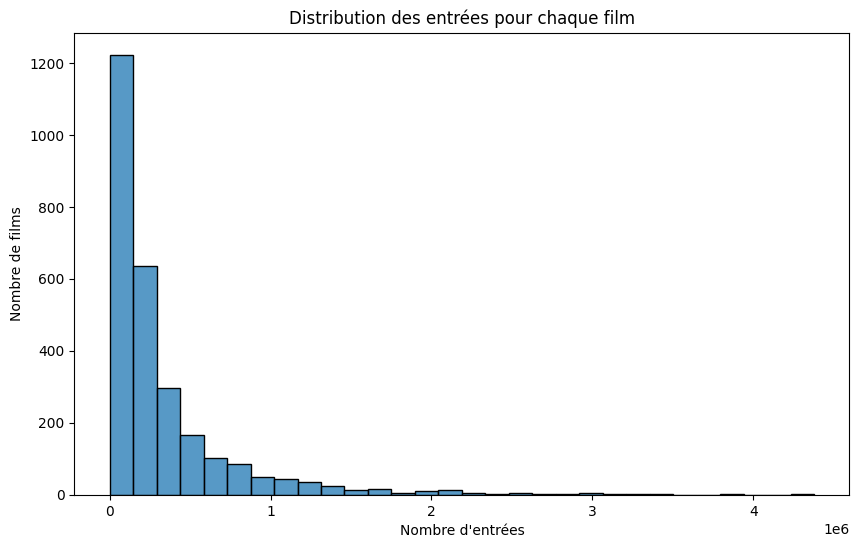

In [56]:
# Visualisation de la distribution des entrées (nombre d'entrées pour chaque film)
plt.figure(figsize=(10, 6))
sns.histplot(df['entries'], bins=30)
plt.xlabel('Nombre d\'entrées')
plt.ylabel('Nombre de films')
plt.title('Distribution des entrées pour chaque film')
plt.show()

### Distribution des genres de films

Drame              1319
Comédie             873
Thriller            755
Action              740
Aventure            588
Crime               408
Romance             403
Fantastique         341
Familial            335
Science-Fiction     323
Horreur             293
Mystère             275
Animation           247
Histoire            176
Guerre               93
Musique              63
Western              35
Documentaire         22
                      1
dtype: int64


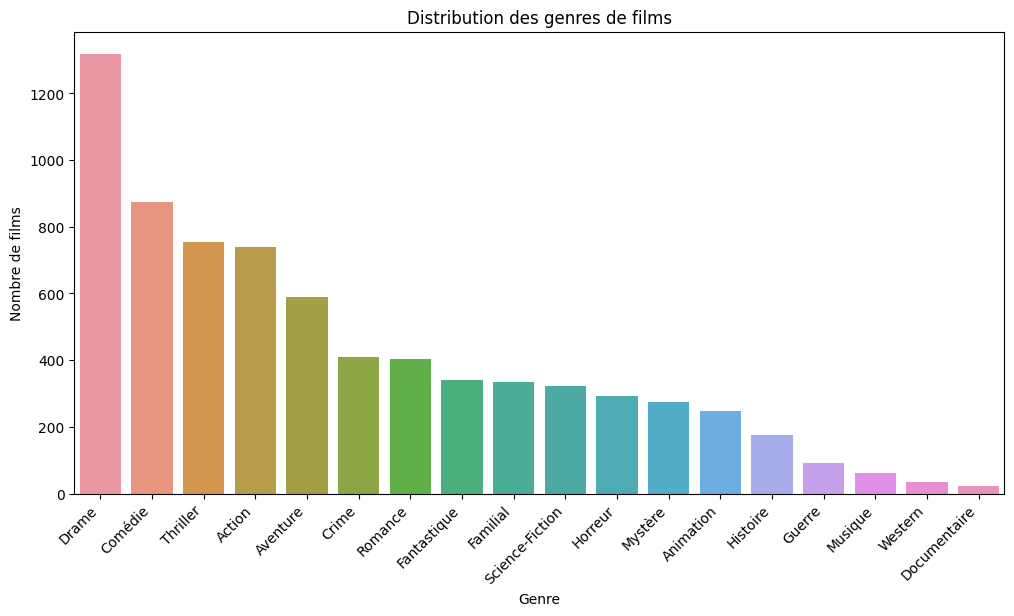

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concaténer toutes les listes de genres en une seule liste
genres_liste = df['nom_genre'].str.split(', ').sum()

# Créer une série pandas avec les genres comme index et compter les occurrences de chaque genre
genres_counts = pd.Series(genres_liste).value_counts()

# Afficher le nombre d'occurrences de chaque genre
print(genres_counts)

import matplotlib.pyplot as plt

# Supprimer l'entrée vide dans le résultat du comptage
genres_counts = genres_counts.drop('')

# Créer le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.title('Distribution des genres de films')
plt.show()

### Top 30 des réalisateurs les plus fréquents

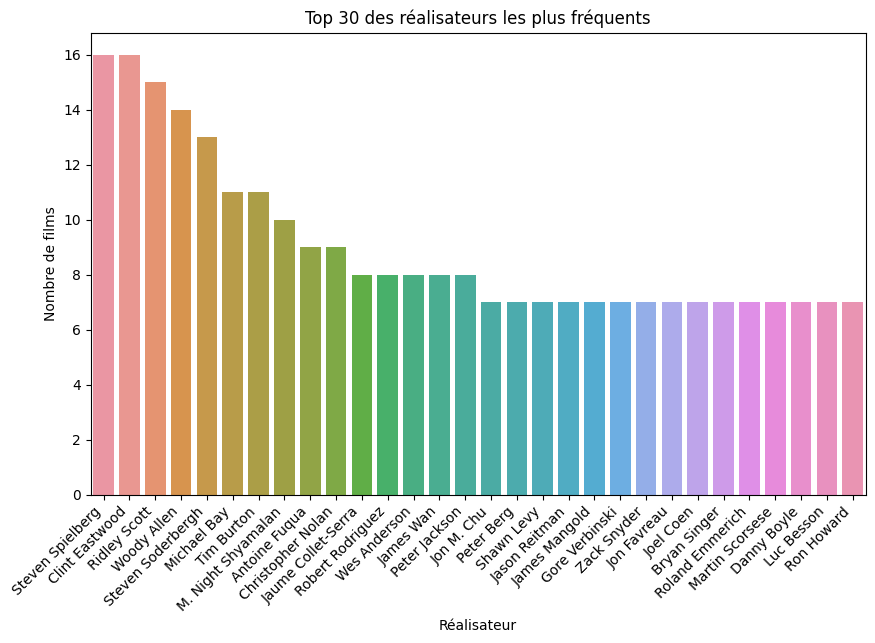

In [60]:
# Visualisation des réalisateurs les plus fréquents
plt.figure(figsize=(10, 6))
top_directors = df['realisateur'].value_counts().nlargest(30)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de films')
plt.title('Top 30 des réalisateurs les plus fréquents')
plt.show()

### Corrélation entre le budget et le nombre d'entrées

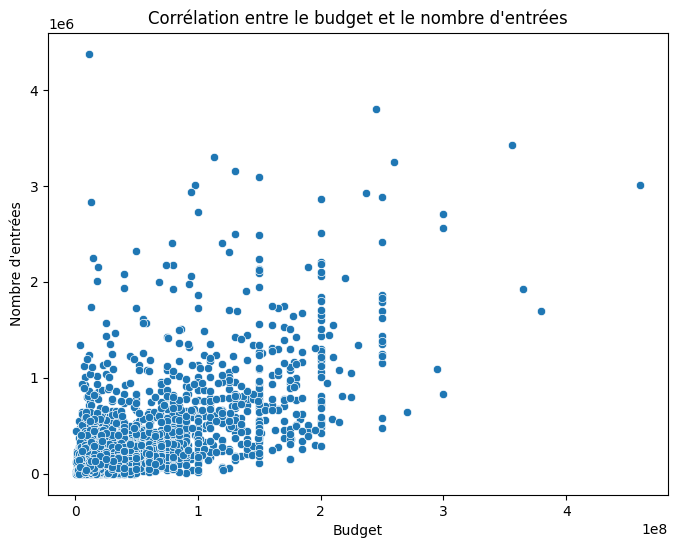

In [62]:
# Visualisation de la corrélation entre le budget et le nombre d'entrées
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='entries', data=df)
plt.xlabel('Budget')
plt.ylabel('Nombre d\'entrées')
plt.title('Corrélation entre le budget et le nombre d\'entrées')
plt.show()

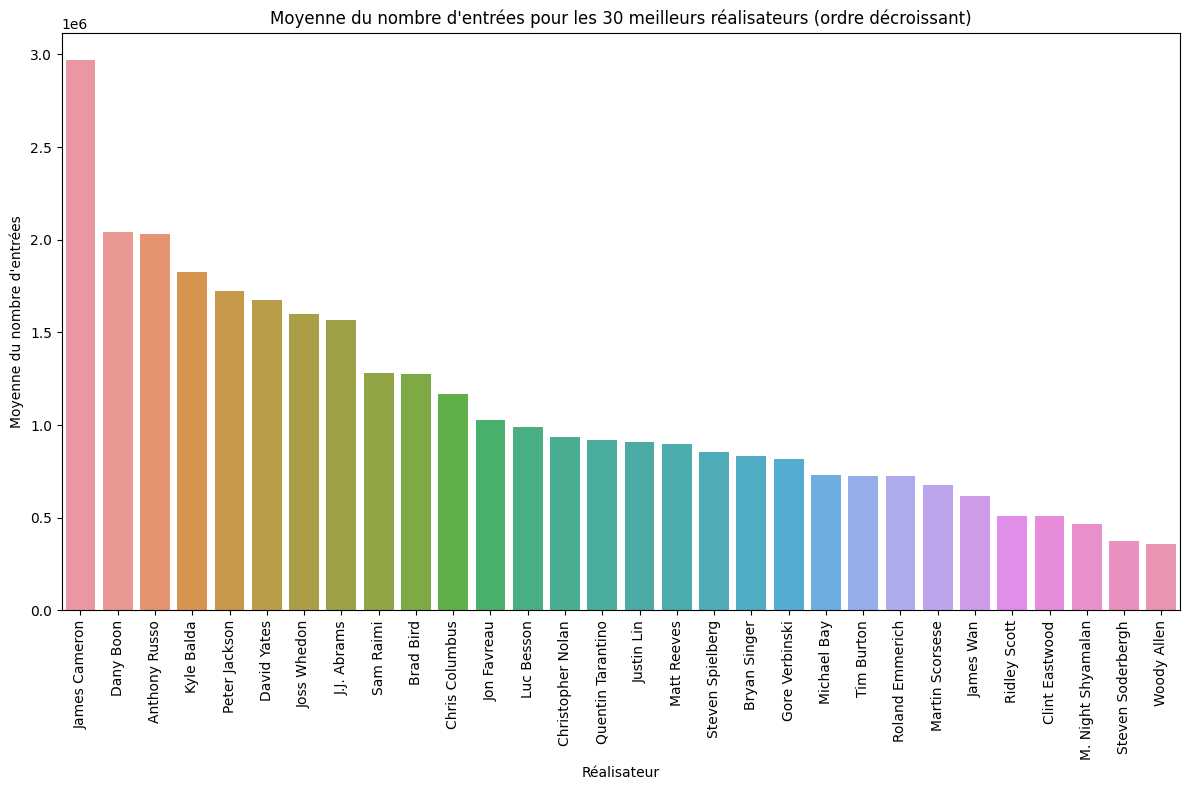

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenir le nombre d'entrées pour chaque réalisateur
entries_by_director = df.groupby('realisateur')['entries'].sum().nlargest(30)

# Obtenir la moyenne du nombre d'entrées pour chaque réalisateur parmi les 30 meilleurs
mean_entries_by_director = df[df['realisateur'].isin(entries_by_director.index)].groupby('realisateur')['entries'].mean()

# Trier les moyennes dans l'ordre décroissant
mean_entries_by_director = mean_entries_by_director.sort_values(ascending=False)

# Créer un graphique à barres pour la moyenne du nombre d'entrées des 30 meilleurs réalisateurs
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_entries_by_director.index, y=mean_entries_by_director.values, order=mean_entries_by_director.index)
plt.xticks(rotation=90)
plt.xlabel('Réalisateur')
plt.ylabel('Moyenne du nombre d\'entrées')
plt.title('Moyenne du nombre d\'entrées pour les 30 meilleurs réalisateurs (ordre décroissant)')
plt.tight_layout()
plt.show()
